In [3]:
pip quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.4 MB/s eta 0:00:00


--- STAGE 1: FETCHING AND PREPARING DATA ---


/tmp/ipython-input-413024765.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  15 of 15 completed


Successfully downloaded data for 15 assets from 2006-01-01 to 2023-12-31.
First 5 rows of the dataset:
Ticker           AAPL     AMZN         GLD      GOOGL        IYR        JNJ  \
Date                                                                          
2012-05-18  15.922063  10.6925  154.550003  14.922106  38.764599  43.122658   
2012-05-21  16.849689  10.9055  154.649994  15.262848  39.561661  43.204346   
2012-05-22  16.720301  10.7665  152.080002  14.932047  39.645905  43.238384   
2012-05-23  17.128275  10.8640  151.619995  15.147281  39.814388  43.068207   
2012-05-24  16.970968  10.7620  151.410004  15.003130  39.937519  43.370632   

Ticker            JPM       META       MSFT      NVDA        QQQ         SPY  \
Date                                                                           
2012-05-18  23.313677  38.021416  23.269144  0.276915  54.061176  102.360779   
2012-05-21  22.631453  33.844330  23.650740  0.281729  55.572491  104.120224   
2012-05-22  23.675665  

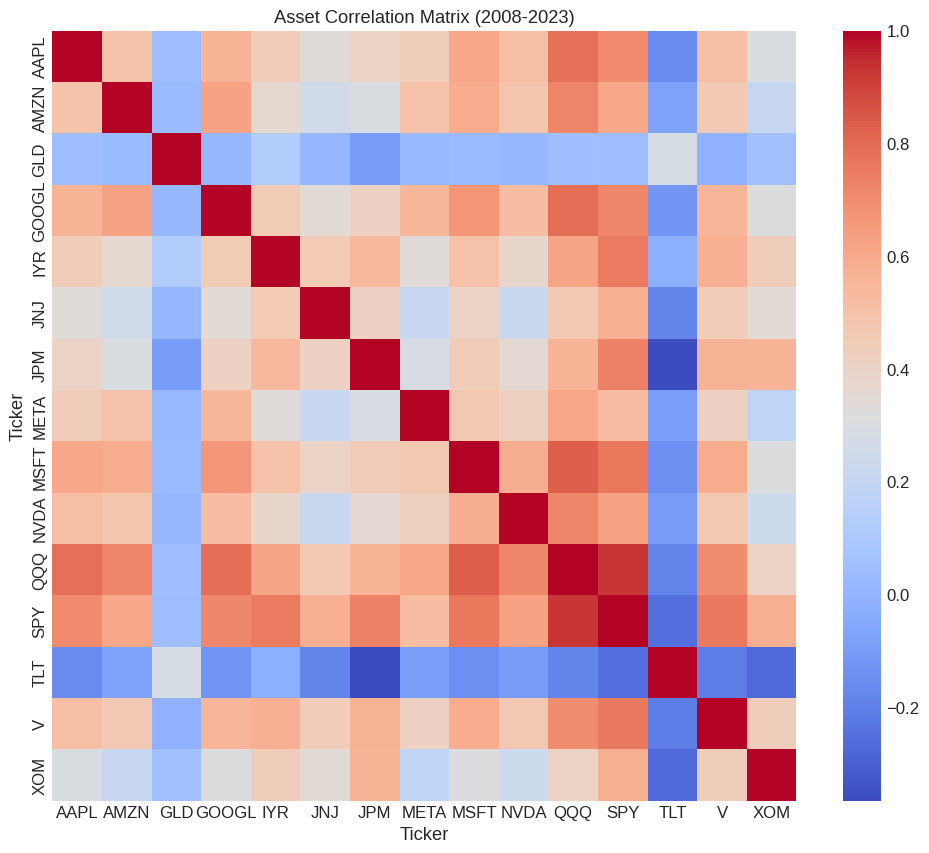

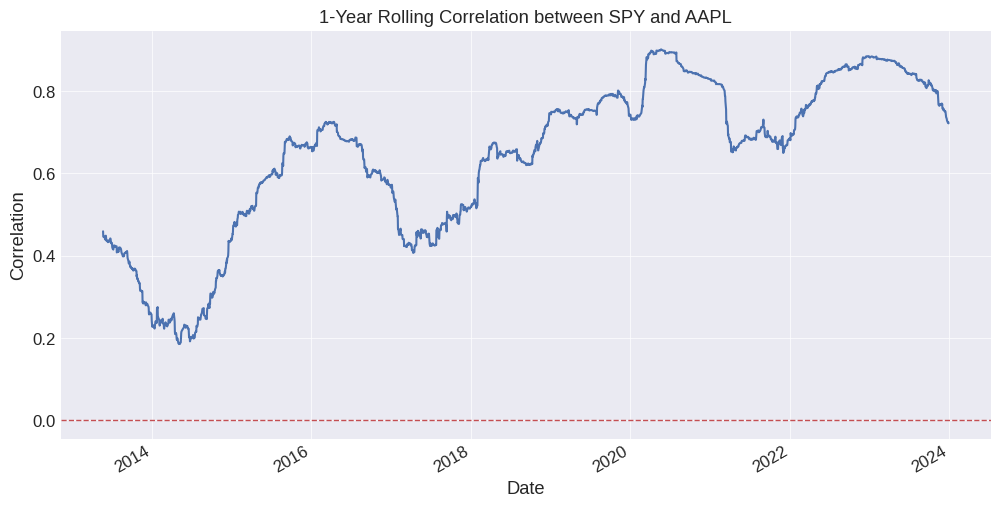



--- STAGE 3: PORTFOLIO OPTIMIZATION WITH MODERN PORTFOLIO THEORY ---
Maximum Sharpe Ratio Portfolio Weights:
         Weight
SPY    0.030724
QQQ    0.049080
TLT    0.033304
GLD    0.000000
IYR    0.000000
AAPL   0.163732
MSFT   0.105882
AMZN   0.000000
GOOGL  0.055391
META   0.230585
NVDA   0.000000
JPM    0.000000
JNJ    0.255357
V      0.075945
XOM    0.000000
Expected Annual Return: 22.60%
Expected Annual Volatility: 16.03%
Sharpe Ratio: 1.35

Minimum Variance Portfolio Weights:
             Weight
SPY    0.000000e+00
QQQ    0.000000e+00
TLT    2.135737e-01
GLD    1.213721e-18
IYR    1.457667e-18
AAPL   1.651057e-01
MSFT   7.946780e-02
AMZN   0.000000e+00
GOOGL  8.884604e-19
META   1.972663e-18
NVDA   2.860051e-18
JPM    1.111750e-01
JNJ    3.968190e-01
V      0.000000e+00
XOM    3.385886e-02
Expected Annual Return: 6.80%
Expected Annual Volatility: 8.41%


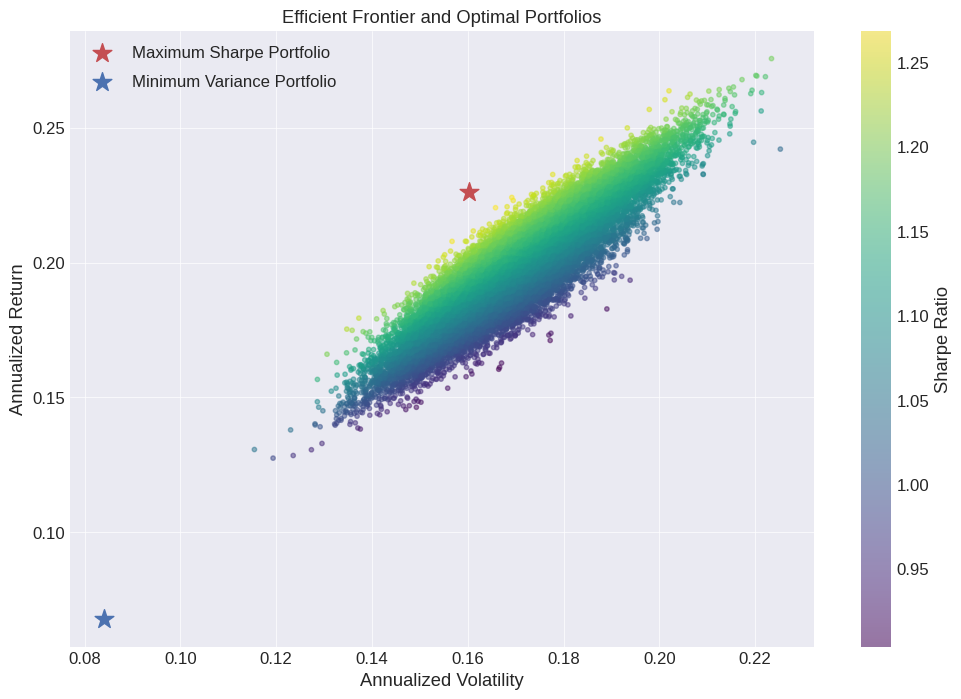



--- STAGE 4: RISK MANAGEMENT AND STRESS TESTING ---
Historical Daily VaR (95%): -1.54%
Historical Daily CVaR (95%): -2.32%
Parametric Daily VaR (95%): -1.57%

2008 Financial Crisis Stress Test (Sep 2008 - Mar 2009):
Portfolio Cumulative Loss: 0.00%

COVID-19 Crash Stress Test (Feb-Mar 2020):
Portfolio Cumulative Loss: -17.65%


--- STAGE 5: DYNAMIC STRATEGY BACKTESTING ---
Generating performance report for the dynamic strategy...


Report saved as 'dynamic_strategy_report_en.html'.


--- STAGE 6: MONTE CARLO SIMULATION FOR FUTURE PROJECTIONS ---
Final optimal weights used for simulation:
             Weight
SPY    1.097588e-16
QQQ    4.506771e-17
TLT    0.000000e+00
GLD    4.913831e-17
IYR    0.000000e+00
AAPL   0.000000e+00
MSFT   8.128490e-17
AMZN   1.732164e-16
GOOGL  4.360743e-02
META   3.024775e-01
NVDA   0.000000e+00
JPM    0.000000e+00
JNJ    1.220563e-17
V      0.000000e+00
XOM    6.539151e-01


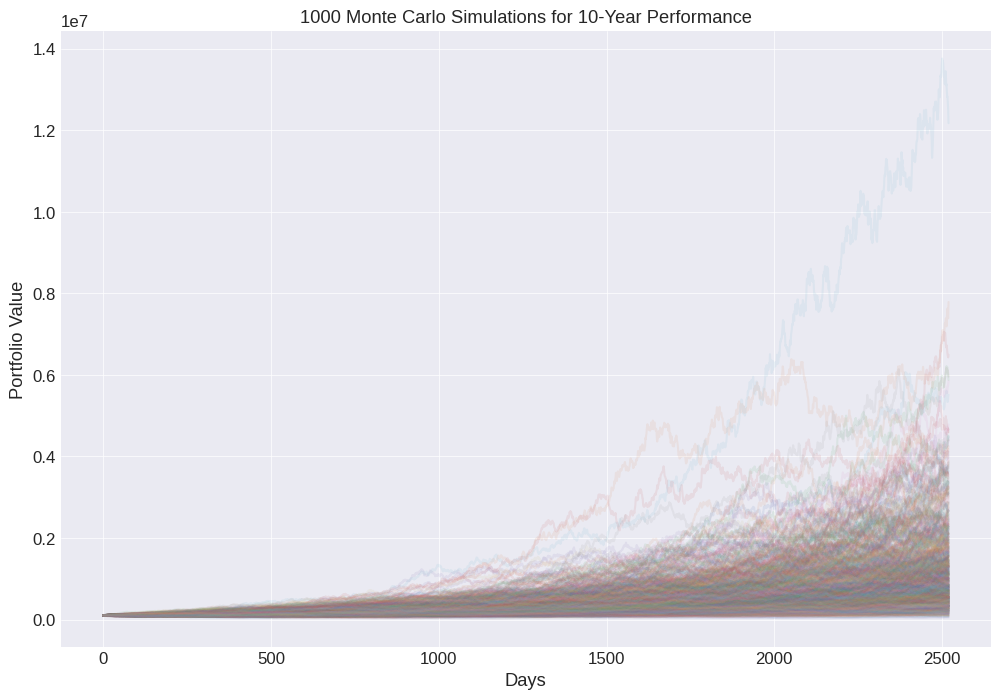

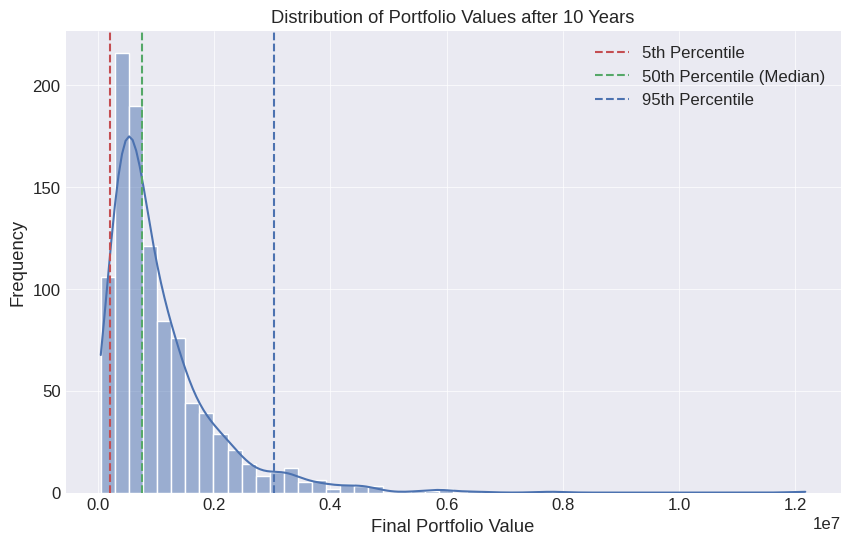


Simulation results after 10 years:
5% Chance of Portfolio Value being below: $211,217.77
Median Expected Portfolio Value: $758,192.01
95% Chance of Portfolio Value being below: $3,024,594.83

Project analysis complete.


In [4]:
# Required Library Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import quantstats as qs

# Set a plot style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')

# --- STAGE 1: DATABASE AND ASSET UNIVERSE ---
print("--- STAGE 1: FETCHING AND PREPARING DATA ---")

# Asset Universe: Broad ETFs + 10 popular S&P 500 stocks from various sectors
# ETFs provide exposure to different asset classes.
# Stocks are for individual security analysis within the portfolio.
tickers = [
    # Asset Class ETFs
    'SPY', 'QQQ', 'TLT', 'GLD', 'IYR',
    # Popular S&P 500 Stocks
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'NVDA', 'JPM', 'JNJ', 'V', 'XOM'
]
# SPY: S&P 500 ETF (Broad US Equities)
# QQQ: Nasdaq 100 ETF (Tech Equities)
# TLT: 20+ Year US Treasury Bond ETF
# GLD: Gold ETF (Commodity)
# IYR: US Real Estate ETF
# AAPL, MSFT, etc.: Large-cap individual stocks

start_date = '2006-01-01'
end_date = '2023-12-31'

# Download adjusted close prices from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Data Cleaning: Drop rows with any missing values (NaN)
data.dropna(inplace=True)

# Calculate daily percentage returns
returns = data.pct_change().dropna()

print(f"Successfully downloaded data for {len(tickers)} assets from {start_date} to {end_date}.")
print("First 5 rows of the dataset:")
print(data.head())
print("\n" + "="*50 + "\n")


# --- STAGE 2: MARKET DYNAMICS AND EXPLORATORY ANALYSIS ---
print("--- STAGE 2: EXPLORATORY DATA ANALYSIS ---")

# Calculate annualized return and volatility
# There are typically 252 trading days in a year.
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# Combine performance metrics into a single DataFrame
performance_df = pd.DataFrame({'Annualized Return': annual_returns, 'Annualized Volatility': annual_volatility})
print("Assets' Annual Performance Metrics:")
print(performance_df)

# Correlation Matrix
correlation_matrix = returns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=False due to many tickers
plt.title('Asset Correlation Matrix (2008-2023)')
plt.show()

# Dynamic (Rolling Window) Correlation Analysis
# Example: Correlation between the broader market (SPY) and a tech stock (AAPL)
rolling_correlation = returns['SPY'].rolling(window=252).corr(returns['AAPL'])
plt.figure(figsize=(12, 6))
rolling_correlation.plot()
plt.title('1-Year Rolling Correlation between SPY and AAPL')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.axhline(0, color='r', linestyle='--', lw=1)
plt.show()
print("\n" + "="*50 + "\n")


# --- STAGE 3: PORTFOLIO OPTIMIZATION AND EFFICIENT FRONTIER ---
print("--- STAGE 3: PORTFOLIO OPTIMIZATION WITH MODERN PORTFOLIO THEORY ---")

# Helper function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return portfolio_return, portfolio_std

# Helper function for Sharpe Ratio (we'll minimize its negative)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_return, p_std = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_return - risk_free_rate) / p_std

# Helper function for portfolio variance (to find the minimum variance portfolio)
def portfolio_variance(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Monte Carlo Simulation to generate thousands of random portfolios
num_portfolios = 25000
results = np.zeros((3, num_portfolios))
weights_record = []

mean_returns = returns.mean()
cov_matrix = returns.cov()
num_assets = len(tickers)

for i in range(num_portfolios):
    # Generate random weights that sum to 1
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return_val, portfolio_std_val = portfolio_performance(weights, mean_returns, cov_matrix)

    results[0,i] = portfolio_return_val
    results[1,i] = portfolio_std_val
    results[2,i] = (portfolio_return_val - 0.01) / portfolio_std_val # Sharpe Ratio

results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# Optimization: Find the portfolio with the Maximum Sharpe Ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
initial_guess = num_assets * [1. / num_assets,]

max_sharpe_opt = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)

max_sharpe_weights = max_sharpe_opt.x
max_sharpe_perf = portfolio_performance(max_sharpe_weights, mean_returns, cov_matrix)
max_sharpe_ratio_val = (max_sharpe_perf[0] - 0.01) / max_sharpe_perf[1]

# Optimization: Find the portfolio with the Minimum Variance
min_variance_opt = minimize(portfolio_variance, initial_guess, args=(mean_returns, cov_matrix),
                            method='SLSQP', bounds=bounds, constraints=constraints)

min_variance_weights = min_variance_opt.x
min_variance_perf = portfolio_performance(min_variance_weights, mean_returns, cov_matrix)

print("Maximum Sharpe Ratio Portfolio Weights:")
print(pd.DataFrame(max_sharpe_weights, index=tickers, columns=['Weight']))
print(f"Expected Annual Return: {max_sharpe_perf[0]:.2%}")
print(f"Expected Annual Volatility: {max_sharpe_perf[1]:.2%}")
print(f"Sharpe Ratio: {max_sharpe_ratio_val:.2f}\n")

print("Minimum Variance Portfolio Weights:")
print(pd.DataFrame(min_variance_weights, index=tickers, columns=['Weight']))
print(f"Expected Annual Return: {min_variance_perf[0]:.2%}")
print(f"Expected Annual Volatility: {min_variance_perf[1]:.2%}")

# Plotting the Efficient Frontier
plt.figure(figsize=(12, 8))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', marker='o', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_perf[1], max_sharpe_perf[0], marker='*', color='r', s=200, label='Maximum Sharpe Portfolio')
plt.scatter(min_variance_perf[1], min_variance_perf[0], marker='*', color='b', s=200, label='Minimum Variance Portfolio')
plt.title('Efficient Frontier and Optimal Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend(labelspacing=0.8)
plt.show()
print("\n" + "="*50 + "\n")


# --- STAGE 4: ADVANCED RISK MANAGEMENT ---
print("--- STAGE 4: RISK MANAGEMENT AND STRESS TESTING ---")

# We will use the max Sharpe portfolio for this analysis
optimal_weights = max_sharpe_weights
portfolio_returns = returns.dot(optimal_weights)

# Tail Risk Measurement: Value at Risk (VaR) and Conditional Value at Risk (CVaR)
confidence_level = 0.05 # For a 95% confidence level

# Historical VaR
hist_var = portfolio_returns.quantile(confidence_level)
print(f"Historical Daily VaR (95%): {hist_var:.2%}")

# Historical CVaR (Expected Shortfall)
hist_cvar = portfolio_returns[portfolio_returns <= hist_var].mean()
print(f"Historical Daily CVaR (95%): {hist_cvar:.2%}")

# Parametric VaR (assuming normal distribution)
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()
z_score = -1.645 # Z-score for 95% confidence
param_var = mu + sigma * z_score
print(f"Parametric Daily VaR (95%): {param_var:.2%}")

# Stress Tests
# 2008 Financial Crisis
crisis_2008_start = '2008-09-01'
crisis_2008_end = '2009-03-01'
crisis_2008_returns = portfolio_returns.loc[crisis_2008_start:crisis_2008_end]
cumulative_loss_2008 = (1 + crisis_2008_returns).prod() - 1
print(f"\n2008 Financial Crisis Stress Test (Sep 2008 - Mar 2009):")
print(f"Portfolio Cumulative Loss: {cumulative_loss_2008:.2%}")

# COVID-19 Pandemic Crash
covid_crash_start = '2020-02-19'
covid_crash_end = '2020-03-23'
covid_crash_returns = portfolio_returns.loc[covid_crash_start:covid_crash_end]
cumulative_loss_covid = (1 + covid_crash_returns).prod() - 1
print(f"\nCOVID-19 Crash Stress Test (Feb-Mar 2020):")
print(f"Portfolio Cumulative Loss: {cumulative_loss_covid:.2%}")
print("\n" + "="*50 + "\n")


# --- STAGE 5: DYNAMIC BACKTESTING ---
print("--- STAGE 5: DYNAMIC STRATEGY BACKTESTING ---")
# This section can be computationally intensive and may take some time.

rebalance_frequency = 90  # Rebalance every 3 months (approx. 90 days)
lookback_window = 3 * 252 # Use 3 years of historical data for optimization

strategy_returns_list = []
dates_list = []
all_weights_list = []

for i in range(lookback_window, len(returns), rebalance_frequency):
    # Get historical data for the lookback period
    hist_returns = returns.iloc[i-lookback_window:i]
    hist_mean_returns = hist_returns.mean()
    hist_cov_matrix = hist_returns.cov()

    # Re-optimize the portfolio for this period (Max Sharpe)
    opt_result = minimize(negative_sharpe_ratio, initial_guess, args=(hist_mean_returns, hist_cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)

    current_weights = opt_result.x
    all_weights_list.append(current_weights)

    # Calculate returns for the next period using the new weights
    future_returns = returns.iloc[i:i+rebalance_frequency]
    period_returns = future_returns.dot(current_weights)

    strategy_returns_list.extend(period_returns)
    dates_list.extend(period_returns.index)

strategy_returns_series = pd.Series(strategy_returns_list, index=dates_list)

# Generate a performance report using quantstats
print("Generating performance report for the dynamic strategy...")
qs.reports.html(strategy_returns_series, benchmark='SPY',
                output='dynamic_strategy_report_en.html',
                title='Dynamic Portfolio Strategy Performance Report')
print("Report saved as 'dynamic_strategy_report_en.html'.")
print("\n" + "="*50 + "\n")


# --- STAGE 6: FUTURE PROJECTIONS WITH MONTE CARLO SIMULATION ---
print("--- STAGE 6: MONTE CARLO SIMULATION FOR FUTURE PROJECTIONS ---")

# Use the last set of optimal weights for the simulation
final_weights = all_weights_list[-1]
print("Final optimal weights used for simulation:")
print(pd.DataFrame(final_weights, index=tickers, columns=['Weight']))

num_simulations = 1000
num_years = 10
initial_portfolio_value = 100000

# Use mean and covariance from the full dataset
mean_returns_full = returns.mean()
cov_matrix_full = returns.cov()

# Cholesky decomposition for correlated random variables
L = np.linalg.cholesky(cov_matrix_full)

simulation_results = np.zeros((num_simulations, num_years * 252))

for i in range(num_simulations):
    daily_returns_sim = []
    # Generate simulated daily returns for the entire period
    for _ in range(num_years * 252):
        # Generate random normal variables
        z = np.random.normal(size=num_assets)
        # Create correlated daily asset returns
        daily_asset_returns = mean_returns_full + np.dot(L, z)
        # Calculate daily portfolio return
        portfolio_return_sim = np.dot(daily_asset_returns, final_weights)
        daily_returns_sim.append(portfolio_return_sim)

    # Calculate the cumulative portfolio path
    portfolio_path = initial_portfolio_value * (1 + pd.Series(daily_returns_sim)).cumprod()
    simulation_results[i, :] = portfolio_path

# Visualize the simulation results
plt.figure(figsize=(12, 8))
plt.plot(simulation_results.T, alpha=0.1)
plt.title(f'{num_simulations} Monte Carlo Simulations for {num_years}-Year Performance')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

# Statistical analysis of the final outcomes
final_values = simulation_results[:, -1]
plt.figure(figsize=(10, 6))
sns.histplot(final_values, kde=True, bins=50)
plt.title(f'Distribution of Portfolio Values after {num_years} Years')
plt.xlabel('Final Portfolio Value')
plt.ylabel('Frequency')
plt.axvline(np.percentile(final_values, 5), color='r', linestyle='--', label='5th Percentile')
plt.axvline(np.percentile(final_values, 50), color='g', linestyle='--', label='50th Percentile (Median)')
plt.axvline(np.percentile(final_values, 95), color='b', linestyle='--', label='95th Percentile')
plt.legend()
plt.show()

print(f"\nSimulation results after {num_years} years:")
print(f"5% Chance of Portfolio Value being below: ${np.percentile(final_values, 5):,.2f}")
print(f"Median Expected Portfolio Value: ${np.percentile(final_values, 50):,.2f}")
print(f"95% Chance of Portfolio Value being below: ${np.percentile(final_values, 95):,.2f}")
print("\nProject analysis complete.")